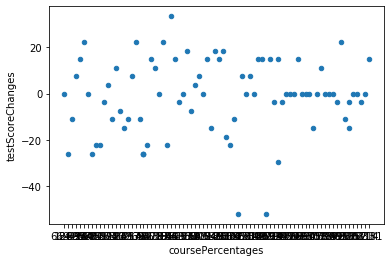

In [2]:
import csv
import pandas

term1_students = {}
answer_key = {}
test_answers = {}

with open("data.csv") as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    for row in reader:
        if(row[0] == 'KEY'):
            for i in range(6,33):
                test_key = "Q"+str(i-5)
                answer_key[test_key] = row[i]
        if(row[0] !='Participant Code' and row[0] != 'KEY' and row[0] != ''):
            if(term1_students.get(row[0]) == None):
                term1_students[row[0]] = {
                    "preTestAnswers":{},
                    "postTestAnswers":{},
                    "courseGrade":'',
                    "coursePercentage":'',
                    "preTestScore":0,
                    "postTestScore":0,
                    "testScoreChange":0
                }
            term1_students[row[0]]["courseGrade"] = str(row[4])
            term1_students[row[0]]["coursePercentage"] = str(row[5])
            for i in range(6,33):
                test_key = "Q"+str(i-5)
                test_answers[test_key] = row[i]
            
        if(row[2] == 'Pre'):
            term1_students[row[0]]["preTestAnswers"] = test_answers
        elif(row[2] == 'Post'):
            term1_students[row[0]]["postTestAnswers"] = test_answers
            
        test_answers = {}
        
data = {
    'testScoreChanges':[],
    'coursePercentages':[]
}
for i in term1_students:
    score = 0.0
    for j in term1_students[i]["preTestAnswers"]:
        if(term1_students[i]["preTestAnswers"][j] == answer_key[j]):
            score += 1
    
    term1_students[i]["preTestScore"] = (score/len(answer_key))*100
    score = 0.0
    
    for k in term1_students[i]["postTestAnswers"]:
        if(term1_students[i]["postTestAnswers"][j] == answer_key[k]):
            score += 1
    
    term1_students[i]["postTestScore"] = (score/len(answer_key))*100
    term1_students[i]["testScoreChange"] = term1_students[i]["postTestScore"] - term1_students[i]["preTestScore"]
    data['coursePercentages'].append(term1_students[i]["coursePercentage"])
    data['testScoreChanges'].append(term1_students[i]["testScoreChange"])
    
    #print(term1_students[i])
    
df = pandas.DataFrame(data,columns=['coursePercentages', 'testScoreChanges'])
df.plot(x='coursePercentages', y='testScoreChanges', kind='scatter')